# FORBES: Highest Paid Athletes in the World

## 1. Biblioteca

In [1]:
# Importando os bibliotecas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 2. Análise Exploratória e Pré-processamento dos Dados

In [2]:
# Importando o Dataset
df_forbes = pd.read_csv("~/Documents/estudos/data-science/projetos/EDA_highest_paid_athletes/Data/Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv")

In [3]:
df_forbes.head()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0


In [4]:
# Criando uma cópia do dataframe original - "df_forbes_mod"
df_forbes_mod = df_forbes.copy()
# Verificando o número de observações e variáveis
n_observ, n_variab = df_forbes_mod.shape
print(f"Número de observações (linhas): {n_observ} \nNúmero de variáveis (colunas): {n_variab}")

Número de observações (linhas): 301 
Número de variáveis (colunas): 8


In [5]:
# Removendo os espaços dos nomes das variáveis "Current Rank", "Previous Year" e "earnings ($ million)"
df_forbes_mod.rename(columns={"Current Rank":"Current_Name", "Previous Year Rank": 
                              "Previous_Year_Rank", "earnings ($ million)": "earnings_$_million"}, inplace=True)
df_forbes_mod.columns = df_forbes_mod.columns.str.lower()
df_forbes_mod.head()

,s.no,name,nationality,current_name,previous_year_rank,sport,year,earnings_$_million
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0


In [6]:
# Verificando valores Missinng (NaN) para cada variável
forbes_variab = df_forbes_mod.columns
df_forbes_mod.isna().sum()  # Variável "Previous Year Rank" contém 24 observações com valores missing (NaN)

s.no                   0
name                   0
nationality            0
current_name           0
previous_year_rank    24
sport                  0
year                   0
earnings_$_million     0
dtype: int64

[Text(0, 0, 's.no'),
 Text(1, 0, 'name'),
 Text(2, 0, 'nationality'),
 Text(3, 0, 'current_name'),
 Text(4, 0, 'previous_year_rank'),
 Text(5, 0, 'sport'),
 Text(6, 0, 'year'),
 Text(7, 0, 'earnings_$_million')]

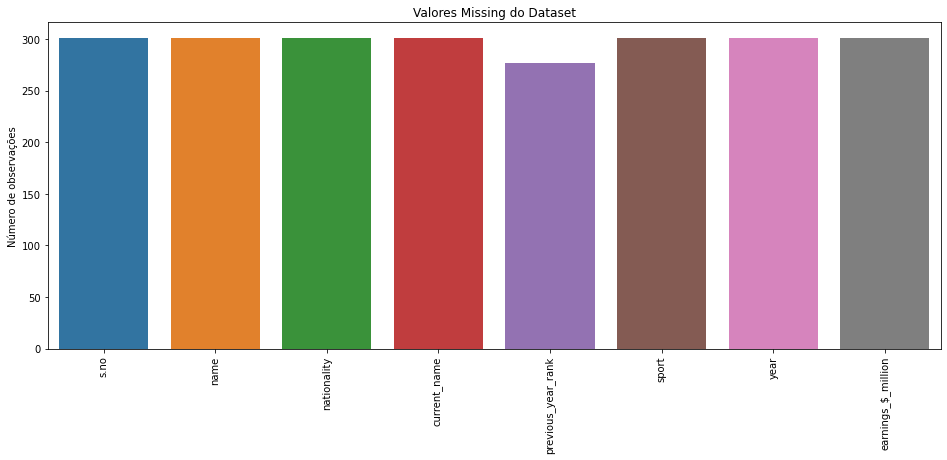

In [7]:
# Criando um Plot para melhor visualizar os valores missing

plt.figure(figsize=(16,6))
missing_plot = sns.barplot(x=forbes_variab, y=df_forbes_mod.count())
missing_plot.set_title("Valores Missing do Dataset")
missing_plot.set_ylabel("Número de observações")
missing_plot.set_xticklabels(forbes_variab.unique().astype(str), rotation="vertical")

In [8]:
# Verificando o tipo de dado de cada variável
df_forbes_mod.dtypes

s.no                    int64
name                   object
nationality            object
current_name            int64
previous_year_rank     object
sport                  object
year                    int64
earnings_$_million    float64
dtype: object

In [9]:
# Mudando o tipo da variável "Year" de int para o tipo datetime.
df_forbes_mod["year"] = df_forbes_mod["year"].apply(pd.to_datetime, format="%Y")

print(df_forbes_mod.dtypes)
df_forbes_mod.head()

s.no                           int64
name                          object
nationality                   object
current_name                   int64
previous_year_rank            object
sport                         object
year                  datetime64[ns]
earnings_$_million           float64
dtype: object


,s.no,name,nationality,current_name,previous_year_rank,sport,year,earnings_$_million
0,1,Mike Tyson,USA,1,NaN,boxing,1990-01-01,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990-01-01,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990-01-01,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990-01-01,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990-01-01,9.0


In [10]:
# Removendo a coluna "S.NO"
df_forbes_mod.drop('s.no', axis=1, inplace=True)
df_forbes_mod.head()

,name,nationality,current_name,previous_year_rank,sport,year,earnings_$_million
0,Mike Tyson,USA,1,NaN,boxing,1990-01-01,28.6
1,Buster Douglas,USA,2,NaN,boxing,1990-01-01,26.0
2,Sugar Ray Leonard,USA,3,NaN,boxing,1990-01-01,13.0
3,Ayrton Senna,Brazil,4,NaN,auto racing,1990-01-01,10.0
4,Alain Prost,France,5,NaN,auto racing,1990-01-01,9.0


In [11]:
# Convertendo as observações da variável "Sport" em maiúsculas
df_forbes_mod["sport"] = df_forbes_mod["sport"].str.upper()
df_forbes_mod.head()

,name,nationality,current_name,previous_year_rank,sport,year,earnings_$_million
0,Mike Tyson,USA,1,NaN,BOXING,1990-01-01,28.6
1,Buster Douglas,USA,2,NaN,BOXING,1990-01-01,26.0
2,Sugar Ray Leonard,USA,3,NaN,BOXING,1990-01-01,13.0
3,Ayrton Senna,Brazil,4,NaN,AUTO RACING,1990-01-01,10.0
4,Alain Prost,France,5,NaN,AUTO RACING,1990-01-01,9.0


In [12]:
# Resumo Estatístico da variável "earnings_$_million"
df_forbes_mod["earnings_$_million"].describe()

count    301.000000
mean      45.516279
std       33.525337
min        8.100000
25%       24.000000
50%       39.000000
75%       59.400000
max      300.000000
Name: earnings_$_million, dtype: float64

<AxesSubplot:ylabel='earnings_$_million'>

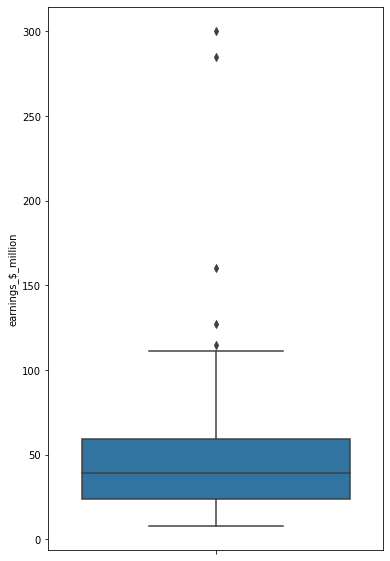

In [13]:
# Criando um boxplot para representar o resumo estatístico da variável "earnings_$_million"

plt.figure(figsize=(6,10))
sns.boxplot(y="earnings_$_million", data=df_forbes_mod)

In [14]:
# Salvando o novo Dataset "df_forbes_mod"
df_forbes_mod.to_csv("~/Documents/estudos/data-science/projetos/EDA_highest_paid_athletes/Data/new_Forbes_Richest_Atheletes_(Forbes_Richest_Athletes_1990-2020).csv")